In [78]:
import pandas as pd
import numpy as np
import os
import math

In [79]:
train_data = pd.read_csv(r"C:\Users\Home\Desktop\Machine_Learning\titanic\train.csv")

In [80]:
train_data.head(18)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


## **Cleaning & Scaling The Data**

In [83]:
age_non_indics = train_data["Age"].isna()
non_ages = train_data[age_non_indics]
#shows all the missing ages in "Age" column
non_ages

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [84]:
def mean_ages_by_relation_optimized(data_frame):
    data = {}
    mr_indexs, mrs_indexs, miss_indexs = [], [], []
    
    for i in range(len(data_frame)):
        passenger_row = data_frame.iloc[i]
        age = passenger_row["Age"]
        if pd.isna(age):
            continue  # Skip rows with NaN age

        title = None
        if "Mrs." in passenger_row["Name"]:
            title = "Mrs."
        elif "Miss." in passenger_row["Name"]:
            title = "Miss."
        elif "Mr." in passenger_row["Name"] or "Master." in passenger_row["Name"] or "Dr." in passenger_row["Name"]:
            title = "Mr."

        if title:
            if title not in data:
                data[title] = []
            data[title].append(age)
            if title == "Mrs.":
                mrs_indexs.append(i)
            elif title == "Miss.":
                miss_indexs.append(i)
            elif title == "Mr.":
                mr_indexs.append(i)

    means = {}
    for title, ages in data.items():
        means[title] = math.floor(sum(ages) / len(ages))

    return means, mr_indexs, mrs_indexs, miss_indexs
mr_mrs_miss_means, mr_indexs, mrs_indexs, miss_indexs = mean_ages_by_relation_optimized(train_data)


In [85]:
mean_age_mr = mr_mrs_miss_means.get("Mr.", None)
mean_age_mrs = mr_mrs_miss_means.get("Mrs.", None)
mean_age_miss = mr_mrs_miss_means.get("Miss.", None)

In [86]:
def fill_non_ages(data_frame, mean_age_mr, mean_age_mrs, mean_age_miss, mr_indexs, mrs_indexs, miss_indexs):
    def g(row):
        if 'Mrs.' in row['Name']:
          return mean_age_mrs
        elif 'Miss.' in row['Name']:
          return mean_age_miss
        elif "Mr." or "Master." or "Dr." in row['Name']:
          return mean_age_mr
        else:
          return row['Age']
            
    data_frame['Age'] = data_frame.apply(g, axis=1)
    return data_frame

train_data = fill_non_ages(train_data.copy(), mean_age_mr, mean_age_mrs, mean_age_miss, mr_indexs, mrs_indexs, miss_indexs)


In [87]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,30,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,21,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,30,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,30,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,21,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,30,0,0,111369,30.0000,C148,C


In [88]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [89]:
#there's only two people with NaN, after searching about them it was find out they board in Southampton 
train_data["Embarked"] = train_data.loc[:, 'Embarked'].fillna('S')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,30,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,21,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,30,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,30,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,21,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,30,0,0,111369,30.0000,C148,C


In [90]:
def get_non_embarked(df)-> pd.core.frame.DataFrame :
    non_embarked_indics = df["Embarked"].isna()
    non_embarked = df[non_embarked_indics]
    print(non_embarked)
    return non_embarked

In [91]:
# Now working on the 'Cabin' column
non_indics = train_data["Cabin"].isna()
non_cabin = train_data[non_indics]

In [92]:
"""
class: first, second, third
the cabins from top to bottom in hirarchy:
         A-C (first class)
         D-E (2nd & 3rd classes)
         F-G (all classes)
         else M for missing values (better approch then ignoring the missing rows(116 in total) 
                                    & random input that will make probably missleading resaults about the data)
"""
train_data["Cabin"] = train_data["Cabin"].fillna("M")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,30,1,0,A/5 21171,7.2500,M,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,35,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,21,0,0,STON/O2. 3101282,7.9250,M,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,30,0,0,373450,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,30,0,0,211536,13.0000,M,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,21,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,M,S
889,890,1,1,"Behr, Mr. Karl Howell",male,30,0,0,111369,30.0000,C148,C


In [93]:
# check for missing values in the data:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [94]:
"""
Droping the ridandent featureas: 
    name
    ticket - the ticket dosent represent the location or the class of the passanger
"""
train_data = train_data.drop(["Name", "Ticket"], axis = 1)
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,30,1,0,7.2500,M,S
1,2,1,1,female,35,1,0,71.2833,C85,C
2,3,1,3,female,21,0,0,7.9250,M,S
3,4,1,1,female,35,1,0,53.1000,C123,S
4,5,0,3,male,30,0,0,8.0500,M,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,30,0,0,13.0000,M,S
887,888,1,1,female,21,0,0,30.0000,B42,S
888,889,0,3,female,21,1,2,23.4500,M,S
889,890,1,1,male,30,0,0,30.0000,C148,C


In [95]:
def create_features(data):
    # Create FamilySize feature
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Create IsAlone feature
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
    
    return data


def drop_features(data):
    data.drop(columns=['SibSp', 'Parch'], inplace=True)
    return data

In [96]:
train_data = create_features(train_data)
train_data = drop_features(train_data)

## **Visualize The Data**

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 2000x1000 with 0 Axes>

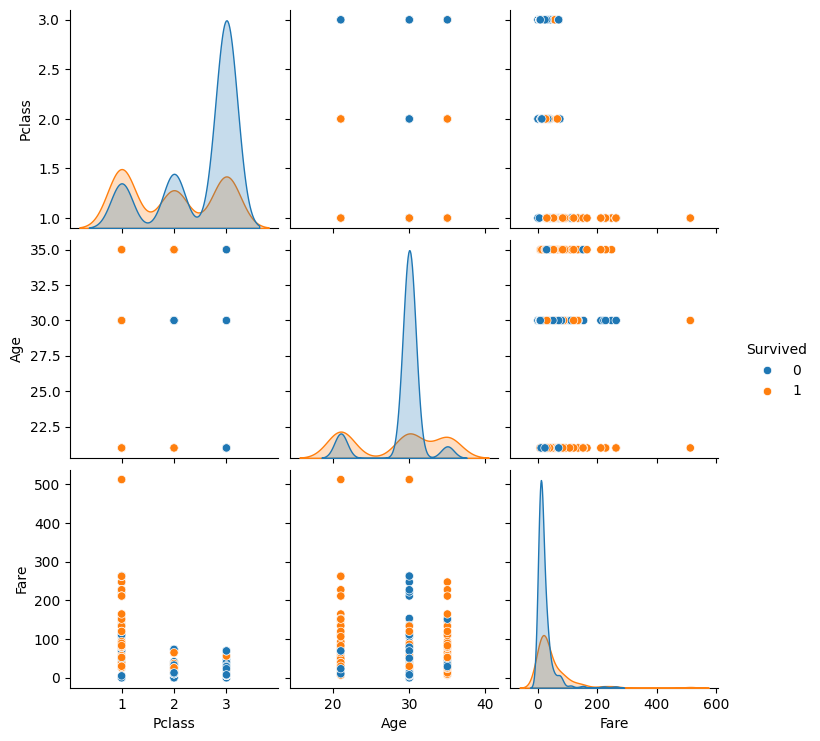

In [98]:
plt.figure(figsize=(20,10))
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived')
plt.show()

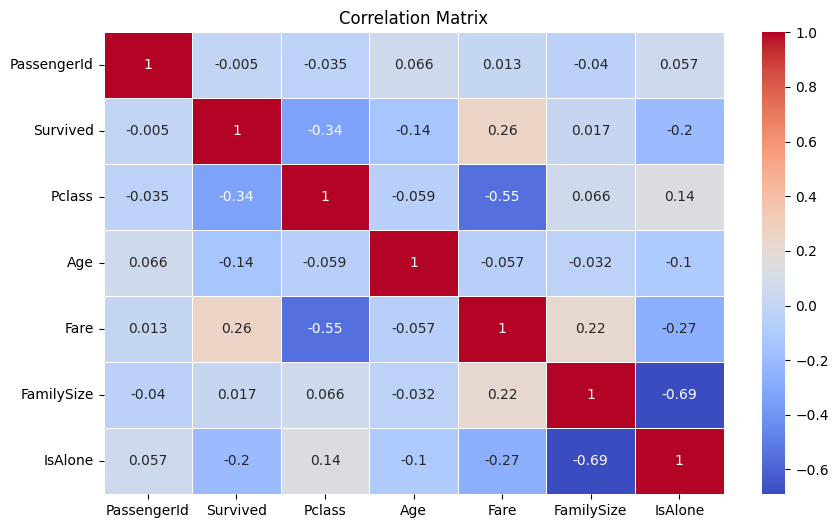

In [99]:
plt.figure(figsize=(10, 6))
corr_matrix = train_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [100]:
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split 

In [101]:
from sklearn.preprocessing import LabelEncoder

# converting the non integers columns to integers
le = LabelEncoder()

def convert_Sex_to_int(df):
    """   
    "sex" column ===> male = 1, female = 0
    """
    df['Sex'] = le.fit_transform(df['Sex'])
 

convert_Sex_to_int(train_data)


def convert_cabin_to_ascii(cabin_value):
    """ 
    converting every letter / number to ascii code and devide by the length
    """
    if pd.isna(cabin_value):
        return ord('M') 
    elif type(cabin_value) == float or type(cabin_value) == int:
        return cabin_value
    if len(cabin_value) == 1:
        return ord(cabin_value) 
    return sum(ord(char) for char in cabin_value) / len(cabin_value)


def convert_Embarked_to_ascii(embarked_value):
    return ord(embarked_value)


train_data["Cabin"] = train_data["Cabin"].apply(convert_cabin_to_ascii)
train_data["Embarked"] = le.fit_transform(train_data["Embarked"])

In [107]:
column_indices_to_keep = [0, 2, 3 , 4 ,5 ,6 , 7 , 8 , 9]  
X = train_data.iloc[:, column_indices_to_keep]
y = train_data.iloc[:, 1]

## **Train The Model**

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.2, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression 

In [110]:
model = LogisticRegression(max_iter=700)

In [111]:
# train the model
model.fit(X_test, y_test)

c:\Users\Home\Desktop\Machine_Learning\titanic\myvenv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=700)

## **Resualt Of The Train Data**

In [112]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.801


## **Cleaning The Test Data**

In [113]:
data_test = pd.read_csv(r"C:\Users\Home\Desktop\Machine_Learning\titanic\test.csv")

#fixing the data_test as trained
data_test = fill_non_ages(data_test.copy(), mean_age_mr, mean_age_mrs, mean_age_miss, mr_indexs, mrs_indexs, miss_indexs)

data_test = data_test.drop(columns=['Name', 'Ticket'], axis = 1)

convert_Sex_to_int(data_test)

data_test["Cabin"] = data_test["Cabin"].apply(convert_cabin_to_ascii)

data_test["Embarked"] = le.fit_transform(data_test["Embarked"])

data_test = create_features(data_test)
data_test = drop_features(data_test)


data_test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,1,30,7.8292,77.00,1,1,1
1,893,3,0,35,7.0000,77.00,2,2,0
2,894,2,1,30,9.6875,77.00,1,1,1
3,895,3,1,30,8.6625,77.00,2,1,1
4,896,3,0,35,12.2875,77.00,2,3,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30,8.0500,77.00,2,1,1
414,1306,1,0,30,108.9000,54.25,0,1,1
415,1307,3,1,30,7.2500,77.00,2,1,1
416,1308,3,1,30,8.0500,77.00,2,1,1


In [114]:
data_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Cabin          0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64

In [115]:
data_test.loc[:, 'Fare'] = data_test['Fare'].fillna(data_test['Fare'].mean())
data_test

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,1,30,7.8292,77.00,1,1,1
1,893,3,0,35,7.0000,77.00,2,2,0
2,894,2,1,30,9.6875,77.00,1,1,1
3,895,3,1,30,8.6625,77.00,2,1,1
4,896,3,0,35,12.2875,77.00,2,3,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30,8.0500,77.00,2,1,1
414,1306,1,0,30,108.9000,54.25,0,1,1
415,1307,3,1,30,7.2500,77.00,2,1,1
416,1308,3,1,30,8.0500,77.00,2,1,1


In [116]:
predictions = model.predict(data_test)
output_folder = r"C:\Users\Home\Desktop\Machine_Learning\titanic\output"
output = pd.DataFrame({'PassengerId': data_test.PassengerId  , 'Survived': predictions})
output.to_csv(output_folder + '\submission.csv', index=False)